# Importamos
pandas, matplotlib, seaborn, numpy, scipy.
# Suprimimos 
Una advertencia de una llamada de función específica usando un administrador de contexto.

In [1]:
import pandas as pd
import matplotlib.pyplot as plta
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Leemos el archivo train dentro de la misma carpeta

In [7]:
df_train = pd.read_csv('train.csv')

# Mostramos las primeras 5 filas

In [8]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Mostramos todas las columnas para ver cuales son importantes

In [10]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Dimensión de la tabla

In [12]:
df_train.shape

(1460, 81)

# Hacemos una lista con precio de venta y el terreno

In [14]:
df_train[['SalePrice','GrLivArea']]

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198
...,...,...
1455,175000,1647
1456,210000,2073
1457,266500,2340
1458,142125,1078


# Precio de venta promedio

In [18]:
df_train['SalePrice'].mean()

180921.19589041095

# Descripción de precio de venta

In [19]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Histograma
distplot() traza una distribución univariada de puntos combinando la función matplotlib hist con las funciones seaborn kdeplot() y rugplot() 

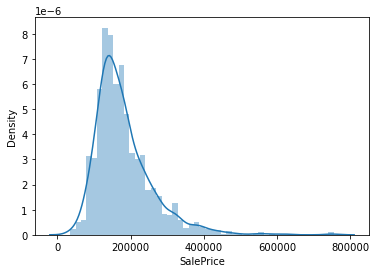

In [21]:
sns.distplot(df_train['SalePrice']);

Tenemos una asimetría de la distribución de probabilidad con respecto a su media. El sesgo positivo indica que la cola está en el lado derecho. Presenta concentración de datos hacia la derecha lo que nos indica una curtosis positiva.

In [27]:
df_train['SalePrice'].skew()

1.8828757597682129

In [28]:
df_train['SalePrice'].kurt()

6.536281860064529

# skew()
 La función skewtest se puede utilizar para determinar la asimetría de los datos presentes en un eje dado.
# Asimetría
Para distribuciones continuas unimodales, un valor de asimetría mayor que cero significa que hay más peso en la cola derecha de la distribución.
# kurt()
Calcula la curtosis para un conjunto de valores en un eje específico
# Curtosis
La curtosis positiva indica que los datos presentan valores atípicos más extremos que una distribución normal y es leptocúrtica.

# Relación entre precio de venta y metros cuadrados de construcción

In [29]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)

axis=1 . Para esta concatenada será a traves del eje 1 (a traves de las columnas)